# Project-1: Logistic Regression 
## (Loan-Prediction)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

d_train=pd.read_csv("E:\PYTHON.AMITY\loan-prediction-train.csv")
d_test=pd.read_csv("E:\PYTHON.AMITY\loan-prediction-test.csv")

In [2]:
d_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
d_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


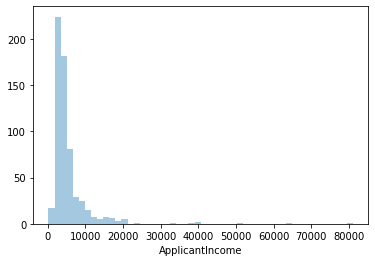

In [4]:
sns.distplot(d_train.ApplicantIncome,kde=False)

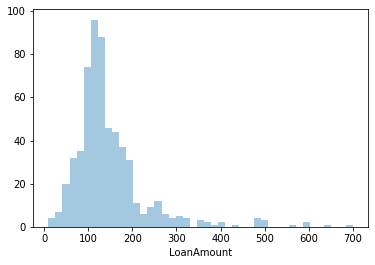

In [5]:
sns.distplot(d_train.LoanAmount.dropna(),kde=False)

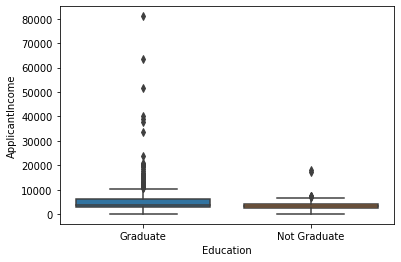

In [6]:
sns.boxplot(x='Education',y='ApplicantIncome',data=d_train)

In [7]:
#turn loan status into binary

modified=d_train
modified['Loan_Status']=d_train['Loan_Status'].apply(lambda x:0 if x=="N" else 1)
#calculate the mean
modified.groupby('Credit_History').mean()['Loan_Status']

Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64

In [8]:
d_train.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#categorical 
d_train['Gender'].fillna(d_train['Gender'].mode()[0],inplace=True)
d_train['Married'].fillna(d_train['Married'].mode()[0],inplace=True)
d_train['Dependents'].fillna(d_train['Dependents'].mode()[0],inplace=True)
d_train['Loan_Amount_Term'].fillna(d_train['Loan_Amount_Term'].mode()[0],inplace=True)
d_train['Credit_History'].fillna(d_train['Credit_History'].mode()[0],inplace=True)

#numercial
d_train['LoanAmount'].fillna(d_train['LoanAmount'].mean(),inplace=True)

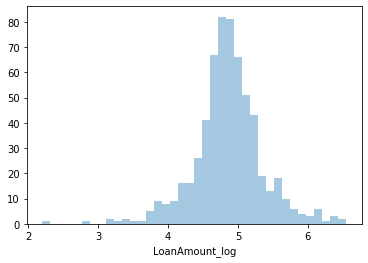

In [10]:
d_train['LoanAmount_log']=np.log(d_train['LoanAmount'])
d_train['TotalIncome']=d_train['ApplicantIncome']+d_train['CoapplicantIncome']
d_train['TotalIncome_log']=np.log(d_train['TotalIncome'])

sns.distplot(d_train.LoanAmount_log,kde=False)

In [11]:
from sklearn.preprocessing import LabelEncoder

category=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
encoder=LabelEncoder()

for i in category:
    d_train[i]=encoder.fit_transform(d_train[i].fillna('0'))
    d_train[i].dtypes

In [12]:
#import the models

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

def classification_model(model,data,predictors,outcome):
    #Fit the model
    model.fit(data[predictors],data[outcome])
    
    #Make predictions on training set:
    predictions=model.predict(data[predictors])
    
    #print accuracy
    accuracy=metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy: %s"%"{0:.3%}".format(accuracy))

In [13]:
outcome_var='Loan_Status'
model=LogisticRegression()
predictor_var=['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model,d_train,predictor_var,outcome_var)

Accuracy: 80.945%
